In [4]:
# Basic Libraries
#NumPy can be used to perform mathematical operations on arrays , multidimensional array.
import numpy as np
#Pandas is an open source Python package that is most widely used for data science/data analysis and machine learning task
import pandas as pd

# Visualization libraries
#Matplotlib is a cross-platform, data visualization and graphical plotting library for Python and its numerical extension NumPy
import matplotlib.pyplot as plt
#pydot is an interface to Graph vizualisation
import pydot
#Seaborn is a visualization library for statistical graphics plotting in Python.
import seaborn as sns

#Evaluation library
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

# Deep Learning libraries
#tensorFlow is a Python library for fast numerical computing created and released by Google.
import tensorflow as tf
from tensorflow.keras import layers
#Keras is a powerful and easy-to-use free open source Python library for developing and evaluating deep learning models.
import keras
from keras.models import Sequential
from keras.layers.core import Dense,Activation,Dropout
from keras.datasets import mnist
from keras.utils.np_utils import to_categorical
from keras.wrappers.scikit_learn import KerasClassifier

In [5]:
#pip install keras==2.7.0
#pip install tensorflow==2.7.0
#pip install pydot

In [6]:
#pip install tensorflow==2.7.0

In [8]:
#Load Digit MNIST dataset
#using the mnist library we load the dataset,this dataset gives training and test set input and test set output
(X_train_digit, y_train_digit), (X_test_digit, y_test_digit) = mnist.load_data()

In [10]:
#How train set saved 
X_train_digit

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [11]:
##How test set saved
y_train_digit

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

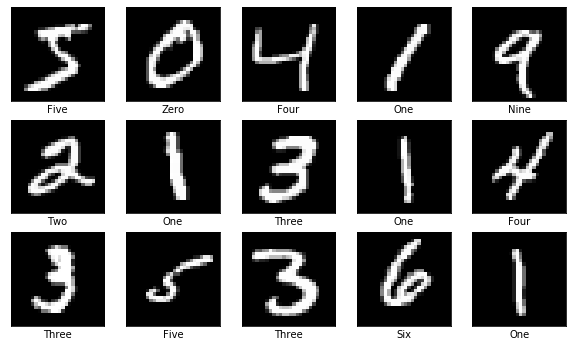

In [14]:
#Names of numbers in the dataset in order
col_names = ['Zero','One','Two','Three','Four','Five','Six','Seven','Eight','Nine']

#Visualizing the digits
#Plot.figure for figure size
plt.figure(figsize=(10,10))
#we have 15 image so we give range 15
for i in range(15):
    #We take 15 image so plot the image in each rows 5 and each column 5 so it is 5x5 matrix
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    #for show the image from already given input train set and cmap for visualization purpose ,its gray color
    plt.imshow(X_train_digit[i], cmap='gray')
    plt.xlabel(col_names[y_train_digit[i]])
#then it show the value
plt.show()

In [15]:
#Input train dataset is 3d shape ,Artificial neural network work only 2d ,so we want to convert it into 3d to 2d 
X_train_digit.shape

(60000, 28, 28)

In [17]:
#its for testset shape
X_test_digit.shape

(10000, 28, 28)

In [18]:
#using reshape we convert 3d to 2d , change the 28x28 matrix into flatten
X_train_digit = X_train_digit.reshape(60000, 784)
X_test_digit = X_test_digit.reshape(10000, 784)

In [19]:
#check the train set shape ,we got 2d
X_train_digit.shape

(60000, 784)

In [20]:
X_test_digit.shape

(10000, 784)

In [21]:
#check the test set shape,we got 1d
y_test_digit.shape

(10000,)

In [22]:
y_train_digit[2]

4

In [23]:
#Encoding Digit MNIST Labels
#from 0 to 9 we classify 10 classes , convert it like one hot enoding ,In ANN the output is 1d so we change into one hot encoding
#In Artificial neural network The output will be in one hot encoding
#Input will be 2d
#Output will be One hot encoding
y_train_digit = to_categorical(y_train_digit, num_classes=10)

y_test_digit = to_categorical(y_test_digit, num_classes=10)

In [24]:
y_test_digit[3]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [25]:
y_train_digit[2]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32)

In [26]:
#Creating base neural network
#In Deep learning model creation is the brain activity
#In machine learning there is no brain activity
#In deep learning there is a brain activity
#ANN and CNN is a sequential process
#Its look like Input Layer -> Hidden layer -> Output layer
model = keras.Sequential([
    #256 is the neuron number and it is hyper tuning parameter or label parameter
    #It is a Procedure
    #Feedforward
    # Inputlayer ->    1_Hidden layer
    #   784      ->       256 
    layers.Dense(256, activation='relu', input_shape=(784,)),
    #layers.Dropout(0.3),
    #layers.BatchNormalization(),
    # Input layer  ->   1_Hidden layer   ->   2_Hidden_layer
    #    784       ->       256                    64
    layers.Dense(64, activation='relu'),
    #layers.Dropout(0.3),
    #layers.BatchNormalization(),
    #InputLayer   ->   1_Hidden Layer   ->  2_Hidden_layer  ->  3_Hiddenlayer
    #    784      ->       256          ->        64        ->     64
    layers.Dense(64, activation='relu'),
    #layers.Dropout(0.3),
    #layers.BatchNormalization(),
    #InputLayer   ->   1_Hidden Layer   ->  2_Hidden_layer  ->  3_Hiddenlayer  -> Outputlayer
    #    784      ->       256          ->        64        ->     64          ->      10
    layers.Dense(10,activation='sigmoid'),
])

In [27]:
#Formula for param_number=output_channel_number*(input_channel_number+1)
#model.summary gives how procedure works
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 64)                16448     
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dense_3 (Dense)             (None, 10)                650       
                                                                 
Total params: 222,218
Trainable params: 222,218
Non-trainable params: 0
_________________________________________________________________


In [28]:
#Compiling the model
#In Deep learning first method is Brain creation and second method is Compile method and third method is fit method
#In Compiling model we use loss , optimiser and metrics
model.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics = ['accuracy'])

In [29]:
#This problem statement come under supervised learning
#Learning Process
history=model.fit(X_train_digit, y_train_digit, batch_size=100, epochs=10,validation_data=(X_test_digit, y_test_digit))

Epoch 1/10
600/600 [==============================] - 9s 13ms/step - loss: 1.4396 - accuracy: 0.8114 - val_loss: 0.4017 - val_accuracy: 0.8966
Epoch 2/10
600/600 [==============================] - 10s 16ms/step - loss: 0.3165 - accuracy: 0.9152 - val_loss: 0.2712 - val_accuracy: 0.9288
Epoch 3/10
600/600 [==============================] - 6s 11ms/step - loss: 0.2284 - accuracy: 0.9384 - val_loss: 0.2268 - val_accuracy: 0.9426
Epoch 4/10
600/600 [==============================] - 9s 15ms/step - loss: 0.1853 - accuracy: 0.9495 - val_loss: 0.2017 - val_accuracy: 0.9500
Epoch 5/10
600/600 [==============================] - 8s 14ms/step - loss: 0.1510 - accuracy: 0.9596 - val_loss: 0.1887 - val_accuracy: 0.9577
Epoch 6/10
600/600 [==============================] - 8s 13ms/step - loss: 0.1376 - accuracy: 0.9619 - val_loss: 0.1768 - val_accuracy: 0.9554
Epoch 7/10
600/600 [==============================] - 9s 15ms/step - loss: 0.1255 - accuracy: 0.9663 - val_loss: 0.1694 - val_accuracy: 0.958

In [30]:
test_loss_digit, test_acc_digit = model.evaluate(X_test_digit, y_test_digit)

313/313 [==============================] - 2s 5ms/step - loss: 0.1740 - accuracy: 0.9637


In [31]:
print('Digit MNIST Test accuracy:', round(test_acc_digit,6))

Digit MNIST Test accuracy: 0.9637


In [33]:
#Predicting the labels-DIGIT
y_predict = model.predict(X_test_digit)

In [34]:
y_predict[0]

array([1.3480475e-06, 8.0237293e-01, 9.8856056e-01, 9.9945617e-01,
       9.9086982e-01, 3.6149025e-03, 8.2808954e-05, 1.0000000e+00,
       4.4842958e-03, 9.9808168e-01], dtype=float32)

In [35]:
#predicted test data
y_predicts=np.argmax(y_predict, axis=1) # Here we get the index of maximum value in the encoded vector

In [36]:
y_predicts

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [37]:
#actual test data
y_test_digit_eval=np.argmax(y_test_digit, axis=1)

In [38]:
y_test_digit_eval

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

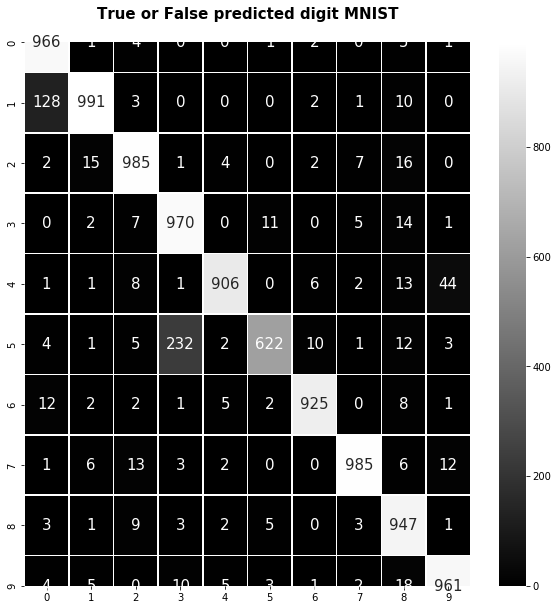

In [39]:
#Confusion matrix for Digit MNIST
con_mat=confusion_matrix(y_test_digit_eval,y_predicts)
plt.style.use('seaborn-deep')
plt.figure(figsize=(10,10))
sns.heatmap(con_mat,annot=True,annot_kws={'size': 15},linewidths=0.5,fmt="d",cmap="gray")
plt.title('True or False predicted digit MNIST\n',fontweight='bold',fontsize=15)
plt.show()

In [40]:
from sklearn.metrics import classification_report

print(classification_report(y_test_digit_eval,y_predicts))

              precision    recall  f1-score   support

           0       0.86      0.99      0.92       980
           1       0.97      0.87      0.92      1135
           2       0.95      0.95      0.95      1032
           3       0.79      0.96      0.87      1010
           4       0.98      0.92      0.95       982
           5       0.97      0.70      0.81       892
           6       0.98      0.97      0.97       958
           7       0.98      0.96      0.97      1028
           8       0.90      0.97      0.94       974
           9       0.94      0.95      0.95      1009

    accuracy                           0.93     10000
   macro avg       0.93      0.92      0.92     10000
weighted avg       0.93      0.93      0.93     10000



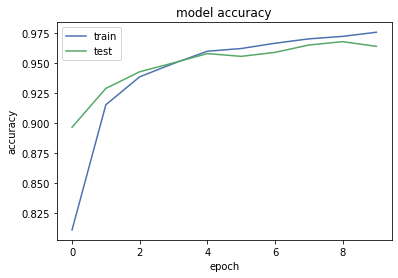

In [41]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()


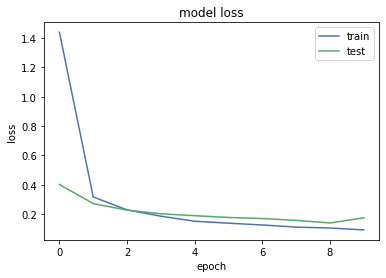

In [42]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

In [43]:
#tf.expand_dims(X_test_digit[0])
y_predict_single = model.predict(X_test_digit[[3]])
y_predicts_single=np.argmax(y_predict_single, axis=1) # Here we get the index of maximum value in the encoded vector
y_test_digit_eval=np.argmax(y_test_digit, axis=1)

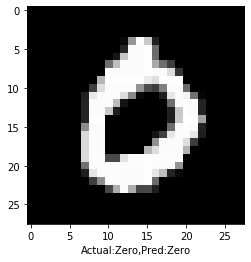

In [44]:
#Names of numbers in the dataset in order
col_names = ['Zero','One','Two','Three','Four','Five','Six','Seven','Eight','Nine']

#Visualizing the digits
#plt.figure(figsize=(10,10))
plt.imshow(X_test_digit[3].reshape(28,28), cmap='gray')
plt.xlabel("Actual:{},Pred:{}".format(col_names[np.argmax(y_test_digit[3])],col_names[y_predicts_single[0]]))
plt.show()

In [45]:
y_test_digit[3]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)